In [1]:
!pip install matplotlib

     |████████████████████████████████| 8.5 MB 757 kB/s eta 0:00:01
     |████████████████████████████████| 61 kB 169 kB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 668 kB/s eta 0:00:01
  Using cached certifi-2020.6.20-py2.py3-none-any.whl (156 kB)
You should consider upgrading via the '/Users/nolwenn/Documents/IPSSI/Python/workbooks/venv/bin/python3 -m pip install --upgrade pip' command.


In [4]:
# Render our plots inline
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (15, 10)

# 1.1 Reading data from a csv file

We're going to be looking some cyclist data from Montréal. Here's the [original page](http://donnees.ville.montreal.qc.ca/dataset/velos-comptage) (in French), but it's already included in this repository. We're using the data from 2012.

This dataset is a list of how many people were on 7 different bike paths in Montreal, each day.

Load the dataset bikes.csv using `read_csv`. As you can see several parameters are available.


In [9]:
df = pd.read_csv('./databases/bikes.csv', encoding='iso-8859-1', delimiter=';')
df

,Date,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
0,01/01/2012,35,NaN,0,38,51,26,10,16,NaN
1,02/01/2012,83,NaN,1,68,153,53,6,43,NaN
2,03/01/2012,135,NaN,2,104,248,89,3,58,NaN
3,04/01/2012,144,NaN,1,116,318,111,8,61,NaN
4,05/01/2012,197,NaN,2,124,330,97,13,95,NaN
...,...,...,...,...,...,...,...,...,...,...
305,01/11/2012,2405,NaN,1208,1701,3082,2076,165,2461,NaN
306,02/11/2012,1582,NaN,737,1109,2277,1392,97,1888,NaN
307,03/11/2012,844,NaN,380,612,1137,713,105,1302,NaN
308,04/11/2012,966,NaN,446,710,1277,692,197,1374,NaN


Select the first 3 rows using the same mechanism as numpy row selection

In [13]:
df.head(3)

,Date,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
0,01/01/2012,35,NaN,0,38,51,26,10,16,NaN
1,02/01/2012,83,NaN,1,68,153,53,6,43,NaN
2,03/01/2012,135,NaN,2,104,248,89,3,58,NaN


You'll notice that this it was not properly loaded : all columns collapsed into one. We will use options of  `read_csv` to fix that

* change the column separator to a `;` with the `sep` option
* Parse the dates in the 'Date' column using `parse_dates`
* Tell it that our dates have the day first instead of the month first
* Set the index to be the 'Date' column with `index_col`

In [22]:
df2 = pd.read_csv('./databases/bikes.csv', encoding='iso-8859-1', sep=';', parse_dates=True, dayfirst=True, index_col='Date')
df2

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN
2012-01-04,144,NaN,1,116,318,111,8,61,NaN
2012-01-05,197,NaN,2,124,330,97,13,95,NaN
...,...,...,...,...,...,...,...,...,...
2012-11-01,2405,NaN,1208,1701,3082,2076,165,2461,NaN
2012-11-02,1582,NaN,737,1109,2277,1392,97,1888,NaN
2012-11-03,844,NaN,380,612,1137,713,105,1302,NaN


# 1.2 Selecting a column

You can select a column (or several) like a dictionnary just put the name of the column between a brack : 
`df['column_name']` or `df[['col1', 'col2', etc]]`

In [26]:
df2['Berri 1']

Date
2012-01-01      35
2012-01-02      83
2012-01-03     135
2012-01-04     144
2012-01-05     197
              ... 
2012-11-01    2405
2012-11-02    1582
2012-11-03     844
2012-11-04     966
2012-11-05    2247
Name: Berri 1, Length: 310, dtype: int64

In [28]:
df[['Pierre-Dupuy', 'Rachel1']]

,Pierre-Dupuy,Rachel1
0,10,16
1,6,43
2,3,58
3,8,61
4,13,95
...,...,...
305,165,2461
306,97,1888
307,105,1302
308,197,1374


# 1.3 Plotting a column

Plot the column using  `.plot()` 

We can see that, unsurprisingly, not many people are biking in January, February, and March, 

<AxesSubplot:xlabel='Date'>

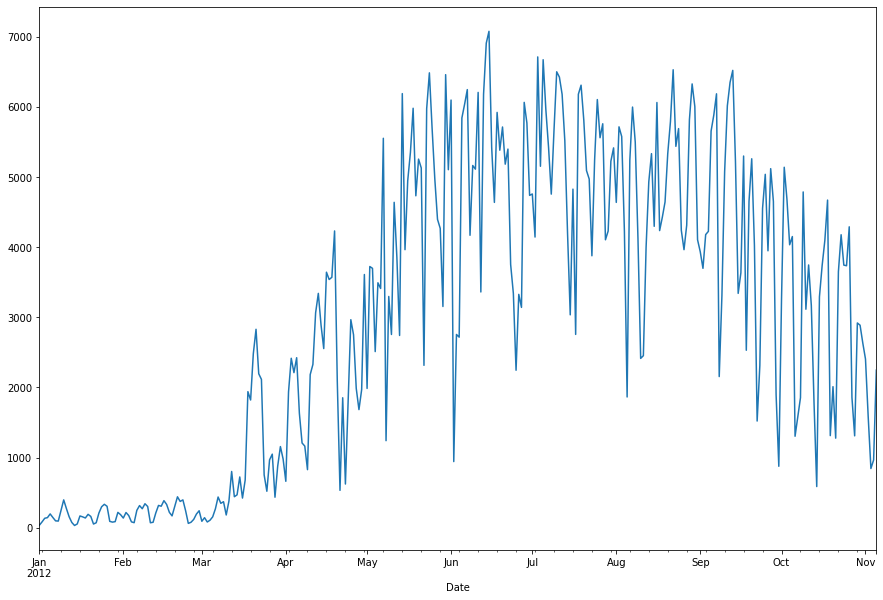

In [30]:
df2['Berri 1'].plot()

We can also plot all the columns of dataframe using the same mechanism. 

<AxesSubplot:xlabel='Date'>

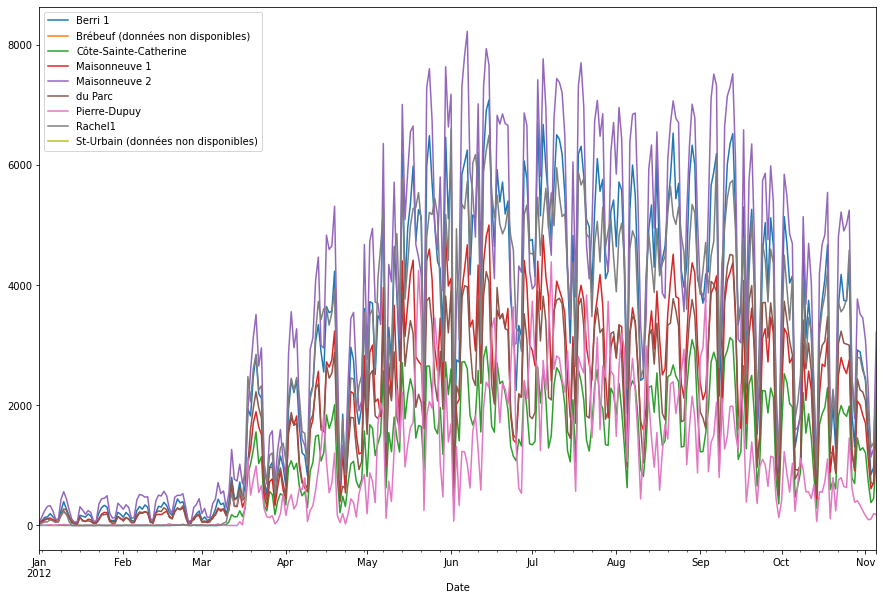

In [31]:
df2.plot()

However it is a bit cluttered as you can see. Plot it again using the `subplots=True` parameter

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

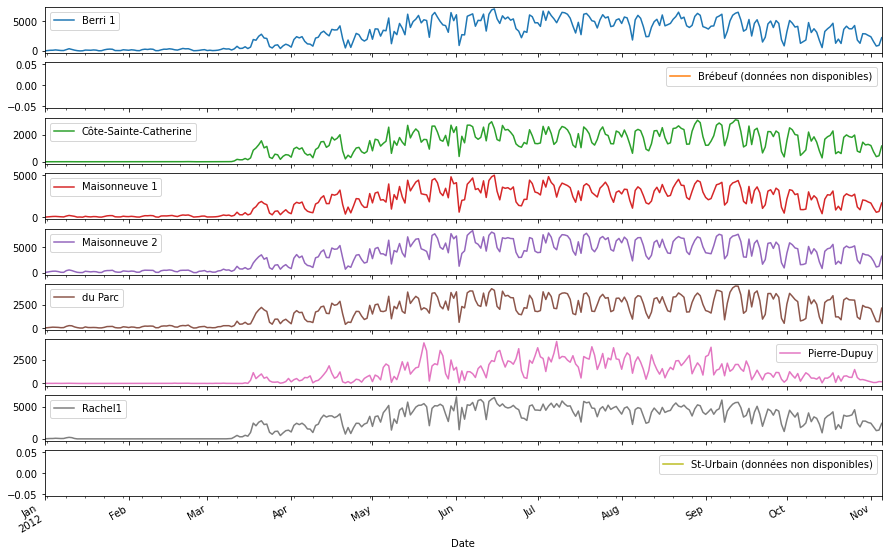

In [32]:
df2.plot(subplots=True)

<style>
    @font-face {
        font-family: "Computer Modern";
        src: url('http://mirrors.ctan.org/fonts/cm-unicode/fonts/otf/cmunss.otf');
    }
    div.cell{
        width:800px;
        margin-left:16% !important;
        margin-right:auto;
    }
    h1 {
        font-family: Helvetica, serif;
    }
    h4{
        margin-top:12px;
        margin-bottom: 3px;
       }
    div.text_cell_render{
        font-family: Computer Modern, "Helvetica Neue", Arial, Helvetica, Geneva, sans-serif;
        line-height: 145%;
        font-size: 130%;
        width:800px;
        margin-left:auto;
        margin-right:auto;
    }
    .CodeMirror{
            font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
    }
    .text_cell_render h5 {
        font-weight: 300;
        font-size: 22pt;
        color: #4057A1;
        font-style: italic;
        margin-bottom: .5em;
        margin-top: 0.5em;
        display: block;
    }
    
    .warning{
        color: rgb( 240, 20, 20 )
        }  